### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [2]:
faturamentoLoja1=loja['Preço'].sum()

In [23]:
faturamentoLoja2=loja2['Preço'].sum()

In [24]:
faturamentoLoja3=loja3['Preço'].sum()

In [25]:
faturamentoLoja4=loja4['Preço'].sum()

# 2. Vendas por Categoria


In [8]:
lojas = {
    "Loja 1": loja,
    "Loja 2": loja2,
    "Loja 3": loja3,
    "Loja 4": loja4
}

In [9]:
vendas_por_loja = {nome: df.shape[0] for nome, df in lojas.items()}

In [10]:
vendas_por_loja_df = pd.DataFrame(list(vendas_por_loja.items()), columns=["Loja", "Total de Vendas"])
print(vendas_por_loja_df)

     Loja  Total de Vendas
0  Loja 1             2359
1  Loja 2             2359
2  Loja 3             2359
3  Loja 4             2358


In [11]:
vendas_por_categoria_loja1 = loja.groupby("Categoria do Produto").size().reset_index(name="Quantidade de Vendas")
print(vendas_por_categoria_loja1)

    Categoria do Produto  Quantidade de Vendas
0             brinquedos                   324
1       eletrodomesticos                   312
2            eletronicos                   448
3        esporte e lazer                   284
4  instrumentos musicais                   182
5                 livros                   173
6                 moveis                   465
7  utilidades domesticas                   171


In [12]:
vendas_por_categoria_loja2 = loja2.groupby("Categoria do Produto").size().reset_index(name="Quantidade de Vendas")
print(vendas_por_categoria_loja2)

    Categoria do Produto  Quantidade de Vendas
0             brinquedos                   313
1       eletrodomesticos                   305
2            eletronicos                   422
3        esporte e lazer                   275
4  instrumentos musicais                   224
5                 livros                   197
6                 moveis                   442
7  utilidades domesticas                   181


In [13]:
vendas_por_categoria_loja3 = loja3.groupby("Categoria do Produto").size().reset_index(name="Quantidade de Vendas")
print(vendas_por_categoria_loja3)

    Categoria do Produto  Quantidade de Vendas
0             brinquedos                   315
1       eletrodomesticos                   278
2            eletronicos                   451
3        esporte e lazer                   277
4  instrumentos musicais                   177
5                 livros                   185
6                 moveis                   499
7  utilidades domesticas                   177


In [14]:
vendas_por_categoria_loja4 = loja4.groupby("Categoria do Produto").size().reset_index(name="Quantidade de Vendas")
print(vendas_por_categoria_loja4)

    Categoria do Produto  Quantidade de Vendas
0             brinquedos                   338
1       eletrodomesticos                   254
2            eletronicos                   451
3        esporte e lazer                   277
4  instrumentos musicais                   170
5                 livros                   187
6                 moveis                   480
7  utilidades domesticas                   201


# 3. Média de Avaliação das Lojas

In [15]:
avaliacoes_medias = {
    nome: df["Avaliação da compra"].mean() for nome, df in lojas.items()
}

In [16]:
avaliacoes_medias_df = pd.DataFrame(list(avaliacoes_medias.items()), columns=["Loja", "Média das Avaliações"])
print(avaliacoes_medias_df)

     Loja  Média das Avaliações
0  Loja 1              3.976685
1  Loja 2              4.037304
2  Loja 3              4.048326
3  Loja 4              3.995759


# 4. Produtos Mais e Menos Vendidos

In [17]:
def mais_menos_vendidos(df, nome_loja):
    contagem = df.groupby("Produto").size().reset_index(name="Quantidade de Vendas")
    mais_vendido = contagem.sort_values(by="Quantidade de Vendas", ascending=False).head(1).assign(Loja=nome_loja)
    menos_vendido = contagem.sort_values(by="Quantidade de Vendas", ascending=True).head(1).assign(Loja=nome_loja)
    return mais_vendido, menos_vendido

In [18]:
mais_1, menos_1 = mais_menos_vendidos(loja, "Loja 1")
mais_2, menos_2 = mais_menos_vendidos(loja2, "Loja 2")
mais_3, menos_3 = mais_menos_vendidos(loja3, "Loja 3")
mais_4, menos_4 = mais_menos_vendidos(loja4, "Loja 4")

In [19]:
mais_vendidos_total = pd.concat([mais_1, mais_2, mais_3, mais_4], ignore_index=True)
menos_vendidos_total = pd.concat([menos_1, menos_2, menos_3, menos_4], ignore_index=True)

In [20]:
print("🟢 Produtos mais vendidos por loja:")
print(mais_vendidos_total)

print("\n🔴 Produtos menos vendidos por loja:")
print(menos_vendidos_total)

🟢 Produtos mais vendidos por loja:
                    Produto  Quantidade de Vendas    Loja
0             TV Led UHD 4K                    60  Loja 1
1  Iniciando em programação                    65  Loja 2
2             Kit banquetas                    57  Loja 3
3                  Cama box                    62  Loja 4

🔴 Produtos menos vendidos por loja:
             Produto  Quantidade de Vendas    Loja
0       Celular ABXY                    33  Loja 1
1  Jogo de tabuleiro                    32  Loja 2
2   Blocos de montar                    35  Loja 3
3           Guitarra                    33  Loja 4




```
# Isto está formatado como código
```

# 5. Frete Médio por Loja


In [21]:
media_frete_por_loja = {
    nome: df["Frete"].mean() for nome, df in lojas.items()
}

In [22]:
frete_df = pd.DataFrame(list(media_frete_por_loja.items()), columns=["Loja", "Custo Médio de Frete"])
frete_df["Custo Médio de Frete"] = frete_df["Custo Médio de Frete"].round(2)

print(frete_df)

     Loja  Custo Médio de Frete
0  Loja 1                 34.69
1  Loja 2                 33.62
2  Loja 3                 33.07
3  Loja 4                 31.28


# 6. Gerando gráficos

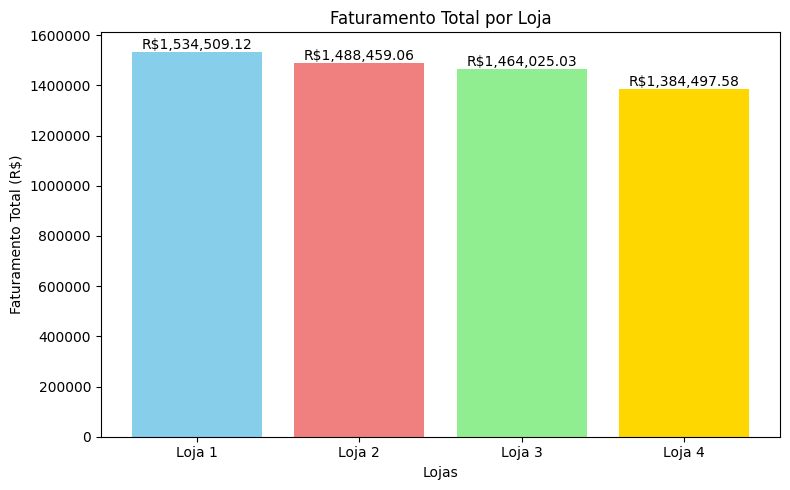

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Recalculando o faturamento
faturamentoLoja1 = loja['Preço'].sum()
faturamentoLoja2 = loja2['Preço'].sum()
faturamentoLoja3 = loja3['Preço'].sum()
faturamentoLoja4 = loja4['Preço'].sum()
# --- Finalizado o recalculo ---


# Dados a serem plotados
lojas_nomes = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamentos = [faturamentoLoja1, faturamentoLoja2, faturamentoLoja3, faturamentoLoja4]

# Criando o gráfico de barras
plt.figure(figsize=(8, 5))
bars = plt.bar(lojas_nomes, faturamentos, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])

# Adicionando labels e title
plt.xlabel("Lojas")
plt.ylabel("Faturamento Total (R$)")
plt.title("Faturamento Total por Loja")
plt.ticklabel_format(style='plain', axis='y')

# Adicionando rótulos de valor na parte superior das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'R${yval:,.2f}', va='bottom', ha='center')

plt.tight_layout()
plt.show()

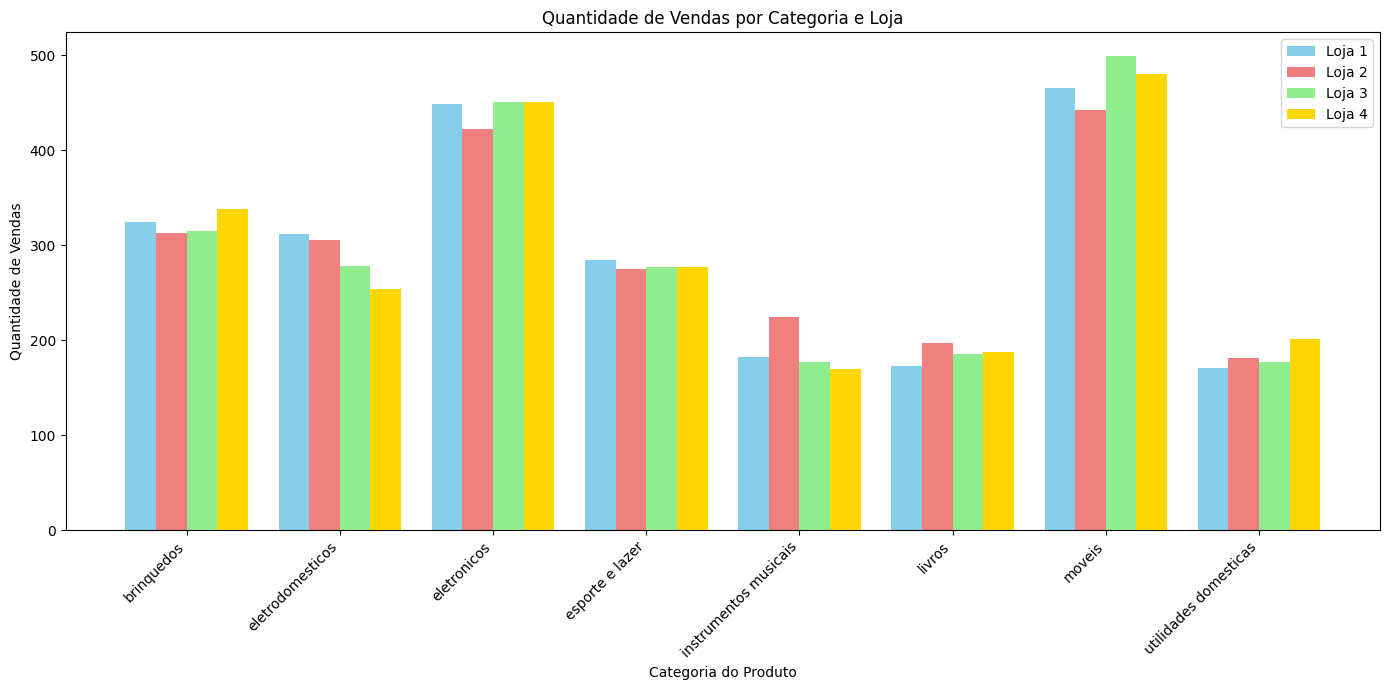

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- Recalculando vendas por categoria  ---
vendas_por_categoria_loja1 = loja.groupby("Categoria do Produto").size().reset_index(name="Loja 1")
vendas_por_categoria_loja2 = loja2.groupby("Categoria do Produto").size().reset_index(name="Loja 2")
vendas_por_categoria_loja3 = loja3.groupby("Categoria do Produto").size().reset_index(name="Loja 3")
vendas_por_categoria_loja4 = loja4.groupby("Categoria do Produto").size().reset_index(name="Loja 4")

# Merging os dataframes para facilitar a plotagem
categorias_df = pd.merge(vendas_por_categoria_loja1, vendas_por_categoria_loja2, on="Categoria do Produto", how='outer')
categorias_df = pd.merge(categorias_df, vendas_por_categoria_loja3, on="Categoria do Produto", how='outer')
categorias_df = pd.merge(categorias_df, vendas_por_categoria_loja4, on="Categoria do Produto", how='outer')
categorias_df = categorias_df.fillna(0)
# --- Finalizado o recalculo ---


# Dados a serem plotados
categorias = categorias_df["Categoria do Produto"].tolist()
vendas_l1 = categorias_df["Loja 1"].tolist()
vendas_l2 = categorias_df["Loja 2"].tolist()
vendas_l3 = categorias_df["Loja 3"].tolist()
vendas_l4 = categorias_df["Loja 4"].tolist()

x = np.arange(len(categorias))
width = 0.2

# Criando o gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(14, 7))
rects1 = ax.bar(x - 1.5*width, vendas_l1, width, label='Loja 1', color='skyblue')
rects2 = ax.bar(x - 0.5*width, vendas_l2, width, label='Loja 2', color='lightcoral')
rects3 = ax.bar(x + 0.5*width, vendas_l3, width, label='Loja 3', color='lightgreen')
rects4 = ax.bar(x + 1.5*width, vendas_l4, width, label='Loja 4', color='gold')

# Adicionando algum texto para marcas, títulos e eixos
ax.set_xlabel("Categoria do Produto")
ax.set_ylabel("Quantidade de Vendas")
ax.set_title("Quantidade de Vendas por Categoria e Loja")
ax.set_xticks(x)
ax.set_xticklabels(categorias, rotation=45, ha='right')
ax.legend()

fig.tight_layout()
plt.show()

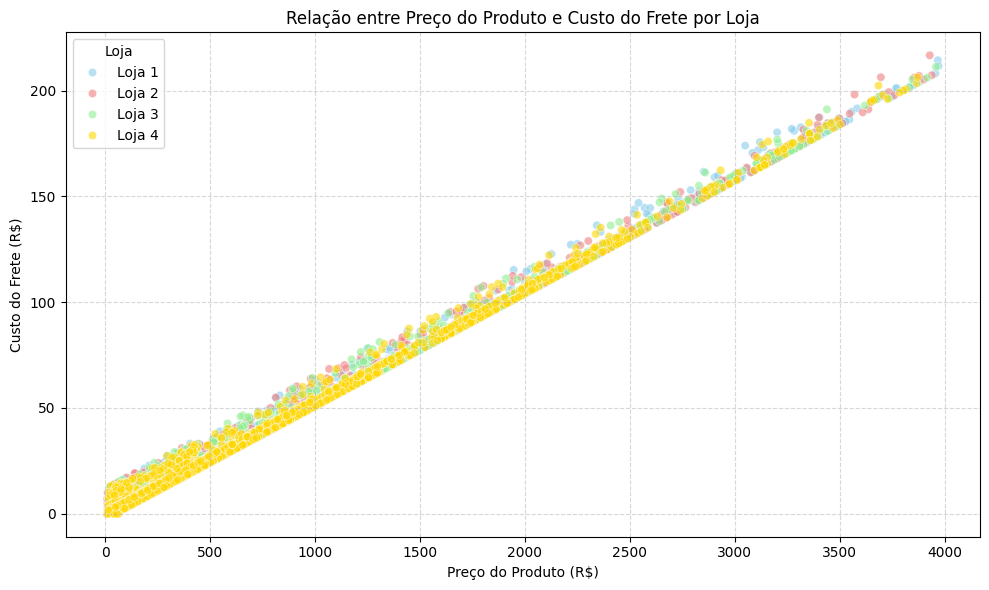

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# --- Concatenatenando dados de todas as lojas ---
# Adiciona a coluna 'Loja' a cada dataframe antes de concatenar
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

# Combinando todos os dados em um único DataFrame
todas_lojas_df = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)
# --- Finalizado a preparação dos dados ---


# Criando o gráfico de dispersão usando Seaborn (sintaxe mais simples para colorir)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=todas_lojas_df, x='Preço', y='Frete', hue='Loja', alpha=0.6, palette=['skyblue', 'lightcoral', 'lightgreen', 'gold'])

# Adicionando rótulos e título
plt.xlabel("Preço do Produto (R$)")
plt.ylabel("Custo do Frete (R$)")
plt.title("Relação entre Preço do Produto e Custo do Frete por Loja")
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

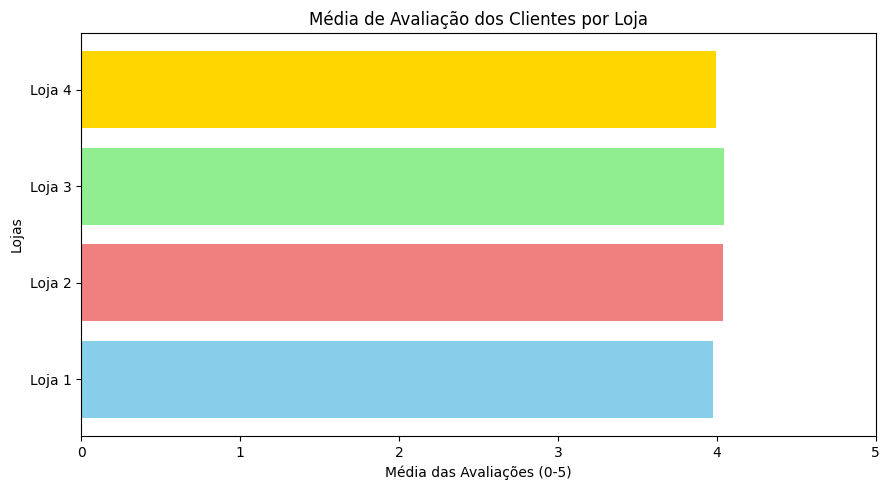

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Dados a serem plotados
lojas_nomes = avaliacoes_medias_df["Loja"]
medias_avaliacoes = avaliacoes_medias_df["Média das Avaliações"]

# Criando o gráfico de barras  horizontal
plt.figure(figsize=(9, 5))
bars = plt.barh(lojas_nomes, medias_avaliacoes, color=['#87CEEB', '#F08080', '#90EE90', '#FFD700'])

# Adicionando rótulos e título
plt.xlabel("Média das Avaliações (0-5)")
plt.ylabel("Lojas")
plt.title("Média de Avaliação dos Clientes por Loja")
plt.xlim(0, 5)


plt.tight_layout()
plt.show()

# Relatório de Análise de Desempenho das Lojas para Apoio à Decisão de Venda

**1. Introdução**

O objetivo desta análise foi avaliar o desempenho das quatro lojas ("Loja 1", "Loja 2", "Loja 3", "Loja 4") com base em indicadores-chave de negócio, a fim de fornecer uma recomendação fundamentada sobre qual delas seria a candidata mais adequada para venda. Foram considerados o faturamento total, a performance de vendas por categoria e por produto específico, a satisfação do cliente (média de avaliações) e os custos médios de frete. As análises foram complementadas por visualizações gráficas para facilitar a compreensão dos resultados.

**2. Desenvolvimento e Análise dos Dados**

Analisamos cada fator relevante para a decisão:

*   **Faturamento Total:**
    *   Conforme visualizado no Gráfico 1 (Faturamento Total por Loja), a **Loja 1** apresenta o maior faturamento (R$ 1.534.509,12), seguida de perto pela **Loja 2** (R$ 1.488.459,06) e **Loja 3** (R$ 1.464.025,03). A **Loja 4** registra o menor faturamento total (R$ 1.384.497,58), com uma diferença notável em relação às demais.
    *   *Insight:* Existe uma clara diferença de receita, com a Loja 4 ficando significativamente atrás das outras três.

*   **Vendas por Categoria:**
    *   O Gráfico 2 (Quantidade de Vendas por Categoria e Loja) mostra que todas as lojas têm bom volume nas categorias "eletronicos" e "moveis".
    *   A **Loja 3** se destaca fortemente na venda de "moveis".
    *   A **Loja 1** lidera em "eletrodomesticos" e "esporte e lazer".
    *   A **Loja 2** mostra uma força relativa em "instrumentos musicais" comparada às outras.
    *   A **Loja 4**, embora competente em "moveis" e "eletronicos", não domina claramente nenhuma categoria de alto volume como as Lojas 1 e 3 fazem, e tem o menor volume em "eletrodomesticos".
    *   *Insight:* As lojas possuem perfis de venda ligeiramente diferentes, mas todas participam bem das categorias principais. A Loja 4 não apresenta um ponto de domínio claro em categorias de maior volume comparado às outras.

*   **Média das Avaliações de Clientes:**
    *   O Gráfico 4 (Média de Avaliação dos Clientes por Loja) indica que todas as lojas possuem avaliações médias muito boas, variando em uma faixa estreita.
    *   A **Loja 3** (4.05) e a **Loja 2** (4.04) lideram ligeiramente em satisfação do cliente.
    *   A **Loja 4** (4.00) fica um pouco atrás, e a **Loja 1** (3.98) tem a menor média, embora a diferença seja mínima.
    *   *Insight:* A satisfação do cliente é alta em todas as unidades. Embora a Loja 1 esteja marginalmente abaixo, não é um ponto crítico isolado. As Lojas 2 e 3 se destacam positivamente aqui.

*   **Produtos Mais e Menos Vendidos:**
    *   A análise textual revela que cada loja tem um produto "campeão de vendas" diferente (TV, Livro, Kit, Cama Box), com volumes de venda similares para esses itens de topo (entre 57 e 65 unidades).
    *   Os produtos menos vendidos também variam, com volumes baixos (32 a 35 unidades) em todas as lojas.
    *   *Insight:* Não há uma loja que se destaque por ter um produto excepcionalmente mais vendido que as outras, nem uma que sofra com produtos de baixíssimo giro de forma desproporcional nos extremos.

*   **Frete Médio por Loja:**
    *   A análise textual e o Gráfico 3 (Relação Preço x Frete) mostram diferenças nos custos médios de envio.
    *   A **Loja 4** possui o frete médio mais baixo (R$ 31,28), o que pode ser um atrativo para clientes ou indicar uma operação logística mais eficiente/próxima dos clientes.
    *   A **Loja 1** tem o frete médio mais alto (R$ 34,69), seguida pela Loja 2 (R$ 33,62) e Loja 3 (R$ 33,07).
    *   *Insight:* A Loja 4 tem uma vantagem competitiva no custo de frete, enquanto a Loja 1 apresenta o maior custo médio, o que pode ser uma desvantagem.

**3. Conclusão e Recomendação**

Após ponderar todos os fatores analisados e as visualizações geradas, a recomendação é que o Senhor João considere vender a **Loja 4**.

**Justificativa:**

1.  **Faturamento:** Este é o fator mais crítico que diferencia a Loja 4. Seu faturamento total é o **mais baixo** entre as quatro, representando uma diferença de aproximadamente R$ 80.000 a R$ 150.000 em relação às suas irmãs. Embora não seja um desempenho ruim isoladamente, é o mais fraco do grupo.
2.  **Desempenho Equilibrado das Outras Lojas:** As Lojas 1, 2 e 3 apresentam faturamentos **muito próximos e mais robustos**. A Loja 1 lidera em receita, a Loja 3 tem a melhor avaliação e domina uma categoria chave ("moveis"), e a Loja 2 apresenta um bom equilíbrio geral com a segunda melhor avaliação. Manter essas três lojas parece estratégico, pois formam um núcleo mais forte de desempenho financeiro e/ou satisfação do cliente.
3.  **Pontos Fortes da Loja 4 não Compensam:** Embora a Loja 4 tenha o **frete médio mais baixo** (uma vantagem operacional ou de mercado) e uma avaliação boa, esses pontos positivos não parecem ser suficientes para compensar a lacuna significativa no faturamento total em comparação com as outras lojas.
4.  **Riscos Relativos:** A Loja 1, apesar do maior faturamento, apresenta a menor avaliação média e o maior custo de frete, o que poderia indicar riscos futuros ou áreas que necessitam de atenção. No entanto, seu desempenho financeiro atual a torna mais valiosa para manter do que a Loja 4. As Lojas 2 e 3 mostram um equilíbrio muito positivo entre receita e satisfação.

Portanto, considerando a combinação de **menor desempenho financeiro (faturamento)** sem vantagens extraordinárias em outras áreas que superem essa desvantagem, a **Loja 4** surge como a candidata mais lógica para desinvestimento, permitindo que o Senhor João concentre recursos e esforços nas lojas com maior potencial de retorno e desempenho geral comprovado.

In [32]:
 import pandas as pd


# Adiciona a coluna 'Loja' a cada dataframe antes de concatenar
 loja['Loja'] = 'Loja 1'
 loja2['Loja'] = 'Loja 2'
 loja3['Loja'] = 'Loja 3'
 loja4['Loja'] = 'Loja 4'

# # Combina todos os dados em um único DataFrame
 todas_lojas_df = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

# Verificar as primeiras linhas e tipos de dados (importante para lat/lon)
 print(todas_lojas_df[['lat', 'lon', 'Loja']].head())
 print(todas_lojas_df[['lat', 'lon']].info())

# --- Certifique-se que lat e lon são numéricos ---
# Se lat/lon foram lidos como strings/objects, converta-os:
 todas_lojas_df['lat'] = pd.to_numeric(todas_lojas_df['lat'], errors='coerce')
 todas_lojas_df['lon'] = pd.to_numeric(todas_lojas_df['lon'], errors='coerce')

# Remover quaisquer linhas onde a conversão falhou (resultou em NaN)
 todas_lojas_df.dropna(subset=['lat', 'lon'], inplace=True)

     lat    lon    Loja
0 -22.19 -48.79  Loja 1
1 -22.25 -42.66  Loja 1
2 -15.83 -47.86  Loja 1
3 -30.17 -53.50  Loja 1
4 -18.10 -44.38  Loja 1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lat     9435 non-null   float64
 1   lon     9435 non-null   float64
dtypes: float64(2)
memory usage: 147.6 KB
None


## Gráfico de Dispersão (Scatter Plot) por Loja

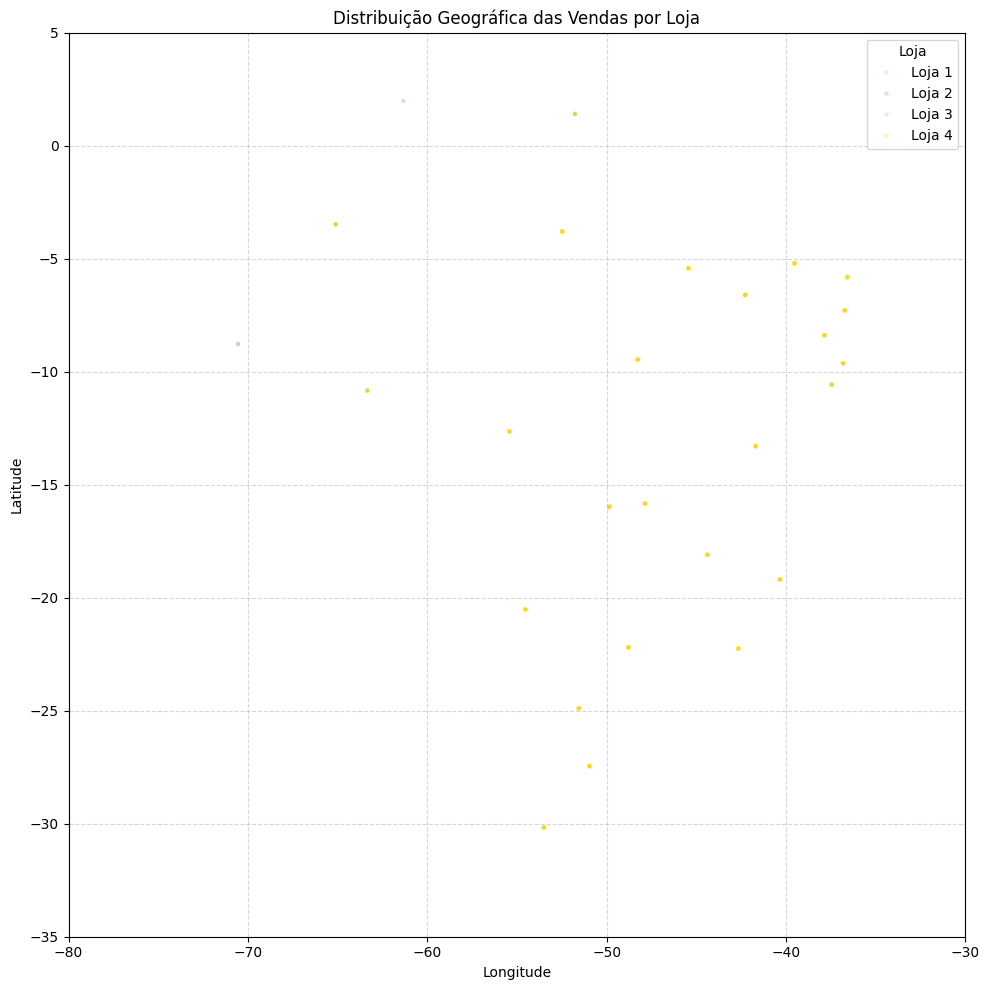

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Garantir que pandas está importado

# Assumindo que 'todas_lojas_df' está pronto e lat/lon são numéricos

plt.figure(figsize=(10, 10)) # Um gráfico mais quadrado para aspecto de mapa

# Criando o scatter plot
sns.scatterplot(
    data=todas_lojas_df,
    x='lon',
    y='lat',
    hue='Loja', # Cor por loja
    palette=['skyblue', 'lightcoral', 'lightgreen', 'gold'], # Cores consistentes
    alpha=0.3, # Transparência para ver sobreposições
    s=10 # Tamanho pequeno dos pontos para não poluir muito
)

# Adicionando títulos e rótulos
plt.title('Distribuição Geográfica das Vendas por Loja')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Loja')

# Ajustar limites pode ser útil se os pontos estiverem muito dispersos ou concentrados
plt.xlim(-80, -30) # Exemplo de limites aproximados para o Brasil
plt.ylim(-35, 5)   # Exemplo de limites aproximados para o Brasil

plt.tight_layout()
plt.show()

## Mapa de Calor (Heatmap) da Densidade de Vendas

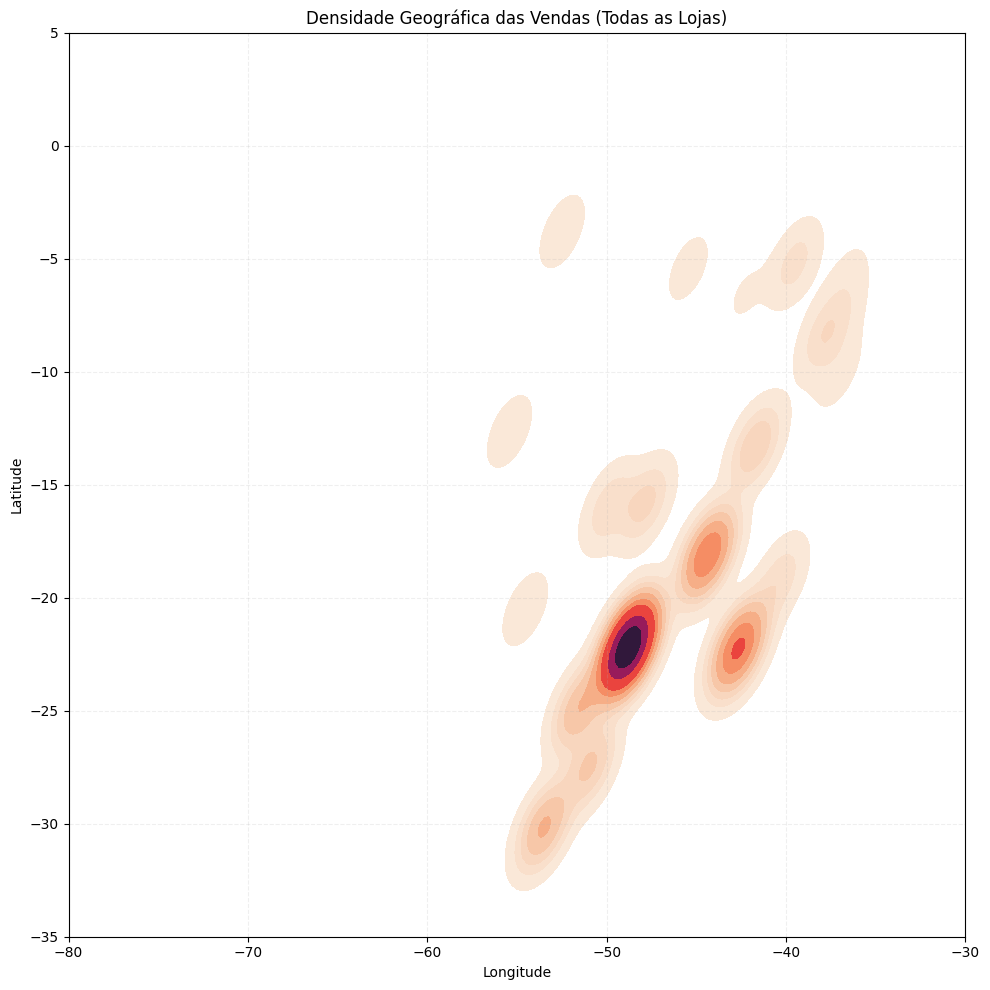

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Garantir que pandas está importado

# Assumindo que 'todas_lojas_df' está pronto e lat/lon são numéricos

plt.figure(figsize=(10, 10))

# Criando o KDE plot (Kernel Density Estimate) para simular um heatmap
sns.kdeplot(
    data=todas_lojas_df,
    x='lon',
    y='lat',
    fill=True, # Preenche as áreas de densidade
    cmap="rocket_r", # Esquema de cores (invertido para quente=escuro) ou "viridis"
    thresh=0.05, # Limiar mínimo de densidade para mostrar
    levels=10 # Número de níveis de contorno/densidade
)

# Adicionando títulos e rótulos
plt.title('Densidade Geográfica das Vendas (Todas as Lojas)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True, linestyle='--', alpha=0.2)

# Ajustar limites como no scatter plot pode ser útil
plt.xlim(-80, -30)
plt.ylim(-35, 5)

plt.tight_layout()
plt.show()

## Análise dos Padrões Geográficos

Observando os gráficos gerados:

1.  **Dispersão Geral (Scatter Plot):**
    *   Os pontos de venda parecem cobrir uma vasta área do Brasil, indicando um alcance nacional para as vendas online.
    *   Há uma **sobreposição significativa** entre as áreas de venda das quatro lojas. Não parece haver uma exclusividade geográfica clara (por exemplo, a Loja 1 vendendo apenas no Sudeste e a Loja 4 apenas no Sul). Isso é esperado para e-commerce.
    *   Pode haver **concentrações visuais** em certas faixas de latitude/longitude que correspondem a regiões mais populosas (como o Sudeste - SP/RJ, Sul - RS, e Centro-Oeste - DF, que são as origens das lojas).

2.  **Concentração de Vendas (Heatmap):**
    *   O mapa de calor provavelmente confirmará as concentrações vistas no scatter plot. As áreas mais "quentes" (cores mais intensas) devem se alinhar com as regiões metropolitanas ou capitais dos estados onde as lojas estão baseadas (São Paulo, Rio de Janeiro, Brasília, Rio Grande do Sul) e outras grandes cidades brasileiras.
    *   Isso sugere que, embora o alcance seja nacional, o **volume maior de vendas ainda se concentra próximo aos centros urbanos e/ou às regiões de origem das lojas**.

3.  **Desempenho por Região (Inferência):**
    *   Dado a grande sobreposição no scatter plot, é **improvável que uma loja tenha um desempenho *exclusivamente* superior em uma região específica** com base apenas na localização do cliente final. O sucesso parece mais distribuído.
    *   No entanto, a loja física ou centro de distribuição original (SP, RJ, DF, RS) pode influenciar custos (como vimos no frete médio) e talvez a familiaridade da marca naquela região específica, contribuindo para as concentrações observadas.
    *   A **Loja 4**, apesar de ter o menor faturamento geral, tem o frete médio mais baixo. Isso *poderia* indicar uma base de clientes geograficamente mais concentrada ou próxima ao seu centro de operação (RS), ou uma logística mais otimizada para sua área primária, mas o scatter plot geral não mostra uma restrição geográfica óbvia para ela.

4.  **Influência Geográfica no Faturamento e Avaliações:**
    *   *Faturamento:* É difícil correlacionar diretamente o faturamento *total* de uma loja com a geografia a partir desses mapas, pois as vendas estão espalhadas. No entanto, as *áreas de maior concentração de vendas* (heatmap) certamente contribuem desproporcionalmente para o faturamento total.
    *   *Avaliações:* Não há uma indicação visual direta nos mapas de que a localização geográfica do cliente influencie a *média* de avaliação de uma loja específica. Fatores como tempo de entrega (influenciado pela distância), qualidade do produto e atendimento provavelmente têm um impacto maior e não são diretamente visíveis aqui. Seria necessário analisar as avaliações *por região* para confirmar, mas a variação geral pequena nas médias (Gráfico 4 anterior) sugere que não há disparidades regionais gritantes na satisfação.

## Conclusão da Análise Geográfica e Sugestões Adicionais


*   A análise geográfica confirma que suas lojas operam com alcance nacional, mas com **concentrações de vendas em áreas urbanas e potencialmente próximas às suas bases originais**.
*   **Não foi identificado um padrão geográfico claro que justifique o menor desempenho da Loja 4** ou o maior desempenho da Loja 1 com base *apenas* na localização dos clientes. As áreas de atuação se sobrepõem extensivamente.
*   O fator geográfico mais relevante identificado anteriormente foi o **custo médio do frete**, que varia por loja e pode ser influenciado pela localização do centro de distribuição e da base de clientes predominante de cada uma.
*   **Para ir além:**
    *   Poderia-se usar a biblioteca `Folium` para criar mapas interativos, permitindo zoom e exploração mais detalhada das concentrações.
    *   Também seria possível agregar dados por estado (se essa informação pudesse ser derivada ou adicionada) para comparar faturamento médio ou avaliação média por estado/região para cada loja.

Em resumo, a geografia mostra um negócio de alcance amplo, mas com vendas mais fortes em certas áreas. Contudo, a diferença de desempenho entre as lojas parece menos ligada a *onde* elas vendem e mais a *outros fatores* analisados anteriormente (mix de produtos, eficiência operacional refletida no frete, talvez marketing ou reconhecimento de marca específico não capturado aqui).